

# Project: Investigate TMDB Movie DataSet

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>I have selected and downloaded the TMDB movie data to explore in this project analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue,through this explore,I want to kown these questions:
1. How popularity, budget, runtime and revenue trends would be like over years?
1. Which genres are most popular from year to year? 
2. What kinds of properties are associated with movies that have high revenues over years?

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpb
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties
Observation Steps:
1. Load csv data and print out a frew lines
1. Inspect the dataset's shape
1. Inspect the dataset's info
1. Check number of duplicate records
1. Check if any columns contain null values

In [333]:
# Load your data and print out a few lines. 
df = pd.read_csv('tmdb-movies.csv')
df.head()



id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

#### Observations
As inspected in the code below,There are 10866 rows ,21 columns and 1 duplicate in the data.

Null values have been found in these columns:
* imdb_id
* cast                      
* homepage                
* director                  
* tagline                 
* keywords                
* overview
* genres                
* production_companies


In [334]:
#Perform operations to inspect data
#types and look for instances of missing or possibly errant data.
print(df.shape)
df.info()
#Check duplicate
sum(df.duplicated())



(10866, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj   

1

In [335]:
#Check null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
#### Drop unsignificant properties
The homepage and tagline have a lot of empty values,id,imdb_id and overview column have nothing to do with data analysis,so I can drop them first

In [336]:
#Drop unsignificant columns
df.drop(['id','imdb_id','homepage','tagline','overview'],axis=1,inplace=True)
df.head()

popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
1   future|chase|post-apocalyptic|dystopia|australia      120   
2  based on novel|revolution|dystopia|sequel|dyst...      119   
3              android|spaceship|jedi|space opera|3d      136   
4                car race|speed|revenge|suspense|car      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

#### Drop duplicated and missing value rows 
The following code will drop duplicated rows,and drop rows where genres value are null,the remaining columns containing missing values are not factors of interest in this initial exploration,so I will not drop all of them. 

In [337]:
# drop duplicated records
df.drop_duplicates(inplace=True)
# drop rows missing value in genres column
df.dropna(subset=['genres'],inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10842 non-null float64
budget                  10842 non-null int64
revenue                 10842 non-null int64
original_title          10842 non-null object
cast                    10767 non-null object
director                10800 non-null object
keywords                9367 non-null object
runtime                 10842 non-null int64
genres                  10842 non-null object
production_companies    9826 non-null object
release_date            10842 non-null object
vote_count              10842 non-null int64
vote_average            10842 non-null float64
release_year            10842 non-null int64
budget_adj              10842 non-null float64
revenue_adj             10842 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.4+ MB


#### Replace 0 in important variables in the dataset
Making use of the .describe() to get a general overview of the dataset to easily identify wrong values along the budget and revenue columns, As we can see the dataset includes 0.0 values until the 50% percentile! This means half of the data in these columns is 0.0, we need to relace 0.0 with the mean value

In [338]:
#df.describe()
budget_mean = df.budget.mean()
revenue_mean = df.revenue.mean()
df.budget.mask(df.budget==0,budget_mean,inplace=True)
df.revenue.mask(df.revenue==0,revenue_mean,inplace=True)
df.describe()

popularity        budget       revenue       runtime    vote_count  \
count  10842.000000  1.084200e+04  1.084200e+04  10842.000000  10842.000000   
mean       0.647461  2.232495e+07  6.197271e+07    102.138443    217.823649   
std        1.001032  2.803615e+07  1.111273e+08     31.294612    576.180993   
min        0.000065  1.000000e+00  2.000000e+00      0.000000     10.000000   
25%        0.208210  1.465531e+07  3.991138e+07     90.000000     17.000000   
50%        0.384532  1.465531e+07  3.991138e+07     99.000000     38.000000   
75%        0.715393  1.500000e+07  3.991138e+07    111.000000    146.000000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count  10842.000000  10842.000000  1.084200e+04  1.084200e+04  
mean       5.974064   2001.314794  1.758712e+07  5.147797e+07  
std        0.934257     12.813617  3.433437e+07  1.447723e+08  
min        1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%        5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%        6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%        6.600000   2011.000000  2.092507e+07  3.387838e+07  
max        9.200000   2015.000000  4.250000e+08  2.827124e+09

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1
####  How popularity, budget, and revenue trends would be like over years?
To answer this question, we can take these steps:
* Using group by function to collect data based on release years
* Using mean function to take the mean values for each group under each year
* Using histograms and lines of moving average to display the counts of variables and exploring the answer:
<ul>
<li><a href="#popularity">popularity trends over release years</a></li>
<li><a href="#budget">budget trends over release years</a></li>
<li><a href="#revenue">revenue trends over release years</a></li>
</ul>


In [339]:
df.sort_values('release_year',inplace=True)
df_year_mean = df.groupby('release_year').mean()

<a id="popularity"></a>
#### popularity trends over release years
As the following code and histogram have showed, we can observate that:
* The distribution of popularity is right-skewed
* Most of the data are distributed between 0.42 to 0.68
* No popularity are distributed in 0.74-0.88,0.92-1.1
* The overall trends of popularity over years are acending

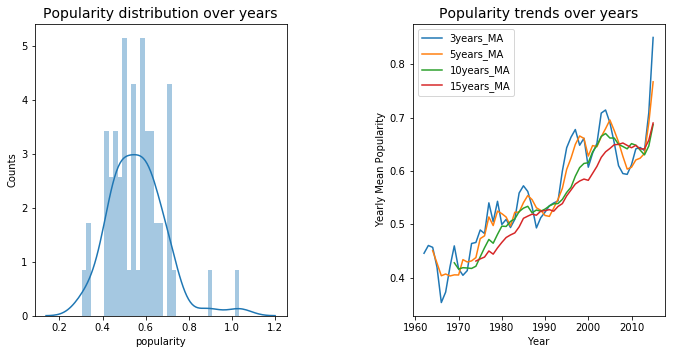

In [340]:
def draw_distribute_trend(column,ma_prefix,title_prefix):
    # draw histogram
    plt.figure(figsize=(20,6))
    plt.subplot(131)
    plt.title(title_prefix+" distribution over years", fontsize=14)
    plt.xlabel("Yearly Mean "+title_prefix)
    plt.ylabel("Counts")
    #plt.hist(df_year_mean[column], bins=35,linewidth=1)
    sns.distplot(df_year_mean[column], kde=True,bins=35);
    
    # draw rolling mean
    plt.subplot(132)
    plt.title(title_prefix+" trends over years", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel("Yearly Mean "+title_prefix)
    ma_list = [3, 5, 10,15]
    for ma in ma_list:
        new_column = ma_prefix + str(ma)
        df_year_mean[new_column] = df_year_mean[column].rolling(window=ma,center=False).mean()
        plt.plot(df_year_mean.index, df_year_mean[new_column],label=str(ma)+'years_MA')
    plt.legend()
    
    #draw density
    #plt.subplot(133)
    #plt.title(title_prefix+" density over years", fontsize=14)
    #sns.kdeplot(df_year_mean[column],bw='silverman',label=column+' desity',shade=True)
    #plt.legend()
    
    plt.subplots_adjust(left=0.2, wspace=0.5, top=0.8)
    plt.show()

draw_distribute_trend('popularity','ma_popularity_','Popularity')


<a id="budget"></a>
#### budget trends over release years
As the following code and histogram have showed, we can observate that:
* The distribution of budget is right-skewed
* Most budget fall in the 0.9e+07 to 1.5e+07 ranges.
* The overall trends of buget are acending till 2000

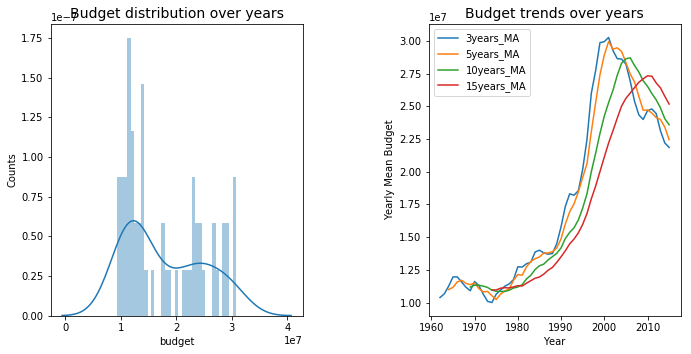

In [341]:

draw_distribute_trend('budget','ma_budget_','Budget')

<a id="revenue"></a>
#### revenue trends over release years
As the following code and histogram have showed, we can observate that:
* The distribution of revenue is left-skewed
* Most revenues fall in the 0.37e+08 to 0.48e+08 ranges.
* The overall trends of revenue over years are acending

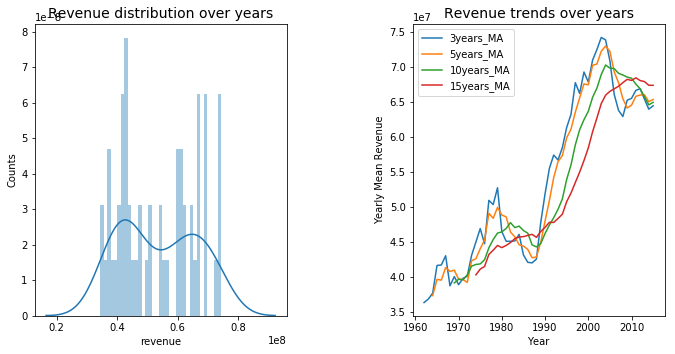

In [342]:

draw_distribute_trend('revenue','ma_revenue_','Revenue')

### Research Question 2 
#### Which genres are most popular from year to year？

To answer this question, we can take these steps:
* Spliting the genre column 
* Using group by function to collect data based on genres
* Using mean function to take the mean values for each group under each genres
* Using sort function to make mean values order by decending
* Using bar to display the popularity mean values and exploring the answe

As seen in the following bar chart, we can know that the Adventure,Science Fiction and Fantasy are the most popular genres from year to year

Text(0.5,1,'Most Popular Genre')

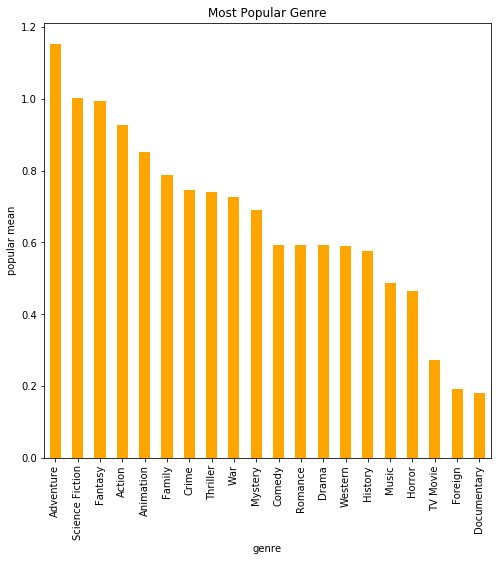

In [347]:
#split the genres column and create a new dataframe with popularity
df_genre = pd.DataFrame(df.genres.str.split('|').tolist(),index=df.popularity).stack()
df_genre = df_genre.reset_index()[[0,'popularity']]
df_genre.columns = ['genre','popularity']
df_genre.head()

#groupby genre and calculate the popularity mean
dfr = df_genre.groupby('genre')['popularity']\
.mean()\
.sort_values(ascending=False)

# draw bar plot
dfr_bar = dfr.plot(kind='bar',figsize=(8,8),color='orange')
dfr_bar.set_ylabel('popular mean')
dfr_bar.set_title('Most Popular Genre')

### Research Question 3
#### What kinds of properties are associated with movies that have high revenues over years?

We can take these steps:
* Using corr function to obtain correlation coefficient and draw thermodynamic diagram
* Finding the highest correlation properties
    * From the correlations matrix and thermodynamic diagram we can seen that vote_count and budget are the 
      highest correlation properties
* Using scatter chart to view and verify the result of relation between highest correlation properties and revenues
     <ul>
         <li><a href="#budget_scatter">scatter chart of budget</a></li>
         <li><a href="#vote_count_scatter">scatter chart of vote count</a></li>
     </ul>
     

              popularity    budget   revenue   runtime  vote_count  \
popularity      1.000000  0.683797  0.772989 -0.498414    0.849249   
budget          0.683797  1.000000  0.914450 -0.431042    0.804362   
revenue         0.772989  0.914450  1.000000 -0.476124    0.854837   
runtime        -0.498414 -0.431042 -0.476124  1.000000   -0.618048   
vote_count      0.849249  0.804362  0.854837 -0.618048    1.000000   
vote_average   -0.579639 -0.736150 -0.682586  0.536402   -0.660248   
budget_adj      0.457633  0.861556  0.735694 -0.074722    0.504045   
revenue_adj    -0.102459 -0.204958  0.042055  0.307478   -0.216553   

              vote_average  budget_adj  revenue_adj  
popularity       -0.579639    0.457633    -0.102459  
budget           -0.736150    0.861556    -0.204958  
revenue          -0.682586    0.735694     0.042055  
runtime           0.536402   -0.074722     0.307478  
vote_count       -0.660248    0.504045    -0.216553  
vote_average      1.000000   -0.547297     0.

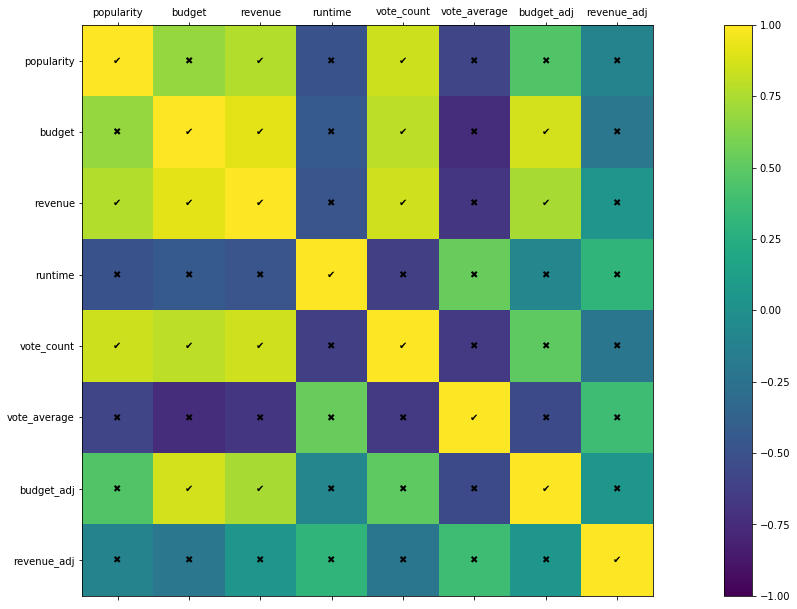

In [360]:

names = ['popularity','budget','revenue','runtime',
         'vote_count','vote_average',
         'budget_adj', 'revenue_adj']
correlations = df_year_mean[names].corr(method='pearson') #using pearson algorithm to calculate correlations  
print(correlations)

# plot correlation matrix
fig = plt.figure(figsize=(25.5,10.5))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
x, y = np.meshgrid(ticks, ticks)
# Drawing symbols based on correlation
for i, (x_val, y_val) in enumerate(zip(x.flatten(), y.flatten())):
    cvalue = correlations[names[x_val]][names[y_val]]
    c = '✖️' if cvalue <= 0.7 else '✔️'
    ax.text(x_val, y_val, c, va='center', ha='center')
plt.show()

<a id="budget_scatter"></a>
#### Scatter chart of budget
We can see that the budget are positively related to overall trend of revenue over years


Text(0.5,1,'Scatter of Revenue and Budget Over the Years')

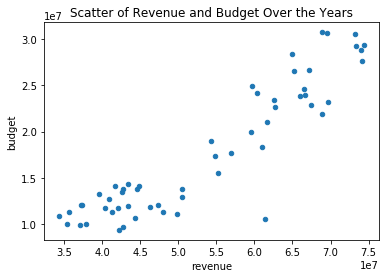

In [361]:
sp = df_year_mean.plot("revenue","budget",kind="scatter",)
sp.set_title('Scatter of Revenue and Budget Over the Years')

<a id="vote_count_scatter"></a>
#### Scatter chart of vote count
We can see that the vote count are positively related to overall trend of revenue over years

Text(0.5,1,'Scatter of Revenue and Budget Over the Years')

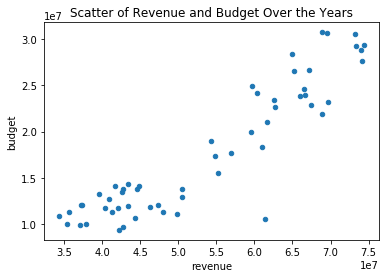

In [362]:
sp = df_year_mean.plot("revenue","budget",kind="scatter",)
sp.set_title('Scatter of Revenue and Budget Over the Years')

<a id='conclusions'></a>
## Conclusions

### limitation
1. There were 50% of budget and revenue have been filled with mean value instead of 0,  so some analysis based on these property may affect the accuracy of the analysis
2. The effect of inflation is not taken into account in the analysis of investment and profit

From this investigation, we can discover these findings and results:
* The distribution of budget and popularity over years are right-skewed,while revenue is left-skewed
* The Adventure,Science Fiction and Fantasy  are the most popular genres from year to year
* Vote_count and budget are the highest correlation properties with movies that have high revenues over years